## Data Mining UniProj - no.1 
#### Sobhan Moradiyan Daghigh & Fatemeh Chaji
##### 11/14/2020


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The format xlsx for excel files need the package xlrd
# Installing it with "!pip install xlrd" ..
# (notice: '!' is needed for installing packages in jupyter)

### Reading the databases

In [3]:
product = pd.read_excel(r"./dataset/product.xlsx")
order_date = pd.read_csv(r"./dataset/tarikhche kharid.csv")
comments = pd.read_excel(r"./dataset/comment.xlsx")
orders = pd.read_csv(r"./dataset/orders.csv")
quality = pd.read_excel(r"./dataset/keifiat.xlsx")

In [4]:
product.head(5)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."


### Using "xlsxwriter" to write in an excel file ..

#### Installing the xlsxwriter
##### !pip install xlsxwriter

In [5]:
# The file Q1.xlsx created ..
writer = pd.ExcelWriter('Q1.xlsx', engine='xlsxwriter')

### Defination of some function 

#### 1 - Seperate the time and date in  two columns

In [6]:
def time_date_seperator(table, col_name):
    table[col_name + "_time"] = pd.to_datetime(table[col_name]).dt.time
    table[col_name + "_date"] = pd.to_datetime(table[col_name]).dt.date
    table = table.drop(col_name, axis=1)
    return table

#### 2- Convert the columns' type which are "datetime64[ns]" in real, but saved az "Object"

In [7]:
def type_converter(table, col_name):
    table[col_name] = pd.to_datetime(table[col_name])
    return table

#### 3- Calculate the outliers for each column

In [8]:
def outliers_cal(table, col_name):
    Q1 = table[col_name].quantile(0.25)
    Q3 = table[col_name].quantile(0.75)
    
    # IQR is interquartile range.
    IQR = Q3 - Q1     

    top_outliers  = Q3 + 1.5 * IQR
    down_outliers = Q1 - 1.5 * IQR

    filtr = (table[col_name] >= down_outliers) & (table[col_name] <= top_outliers)
    return (filtr, top_outliers, down_outliers)

#### 4- The descriptation func which checks all rules and make the wanted table for result

In [9]:
def describtion(table, table_desc):
    # Set the titles 
    df = pd.DataFrame(columns=['نام ویژگی',
                                   'نوع',
                                   'بازه مقادیر',
                                   'Min', 'Max', 'Mean', 'Mode', 'Median',
                                   'مقادیر پرت'])
    
    fig, axes = plt.subplots(len(table.columns), 1, figsize=(10,40))
    # Count of plots
    count = 0
    
    # set the values
    for i in range(len(table_desc.columns)):
        df.loc[i] = ""
        df.loc[i][0] = table_desc.columns[i]
        df.loc[i][1] = table_desc.dtypes[i]
        df.loc[i][3] = table_desc.iloc[6, :][i]
        df.loc[i][4] = table_desc.iloc[10, :][i]
        df.loc[i][5] = table_desc.iloc[4, :][i]
        df.loc[i][6] = table_desc.iloc[2, :][i]
        df.loc[i][7] = table_desc.iloc[8, :][i]
        
        if table_desc.dtypes[i] in ['int', 'float64']:
            filtr, top_outliers, down_outliers = outliers_cal(table, table.columns[i])
            df.loc[i][8] = "topOutliers: " + str(top_outliers) + " - downOutliers: " + str(down_outliers) 
            df.loc[i][2] = "From " + str(table_desc.iloc[6, :][i]) + " to " + str(table_desc.iloc[10, :][i])
            
            plot_boxplot(table, filtr, i, axes, count)
            count = count +1
    
    #remove empty subplot
    for i in range(count, len(table.columns)):
        fig.delaxes(axes[i])
        
    plt.show()
    return df

#### 5- plot a boxplot for each column

In [10]:
def plot_boxplot(table, filtr, i, axes, index):
    
    table[filtr == True].boxplot(column=[table.columns[i]], figsize=(15, 3), vert=False, ax=axes.flatten()[index])  

### Ok .. Let's travel to the Galaxy :)

#### Product database

In [11]:
product.dropna(inplace = True)
product_desc = product.describe(include="all")
product_desc

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
count,522.000000,522,522,522,522,522,522,522,522,522
unique,NaN,517,487,516,344,117,117,79,79,521
top,NaN,کاور سانتا باربارا مدل Black Lable مناسب برای ...,simplewears,کیف-پول-زنانه-چرم-دیبا-کد-z2,تابلو بوم نقاشی، نقاشی کلاسیک، تابلو مدرن، قاب...,کیف و کاور گوشی,کیف و کاور گوشی Cell-Phone-Pouch-Cover,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""چاپ بر روي پار..."
freq,NaN,3,7,3,20,69,69,261,261,2
mean,725372.183908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1328.018194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,723112.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,724198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,725474.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,726247.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


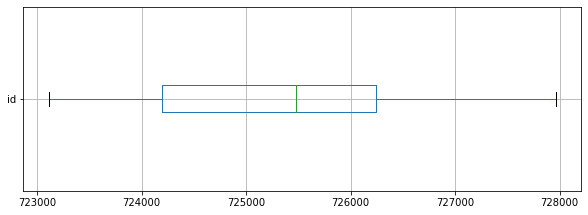

,نام ویژگی,نوع,بازه مقادیر,Min,Max,Mean,Mode,Median,مقادیر پرت
0,id,float64,From 723112.0 to 727967.0,723112,727967,725372,NaN,725474,topOutliers: 729321.75 - downOutliers: 721123.75
1,product_title_fa,object,,NaN,NaN,NaN,کاور سانتا باربارا مدل Black Lable مناسب برای ...,NaN,
2,product_title_en,object,,NaN,NaN,NaN,simplewears,NaN,
3,url_code,object,,NaN,NaN,NaN,کیف-پول-زنانه-چرم-دیبا-کد-z2,NaN,
4,title_alt,object,,NaN,NaN,NaN,تابلو بوم نقاشی، نقاشی کلاسیک، تابلو مدرن، قاب...,NaN,
5,category_title_fa,object,,NaN,NaN,NaN,کیف و کاور گوشی,NaN,
6,category_keywords,object,,NaN,NaN,NaN,کیف و کاور گوشی Cell-Phone-Pouch-Cover,NaN,
7,brand_name_fa,object,,NaN,NaN,NaN,متفرقه,NaN,
8,brand_name_en,object,,NaN,NaN,NaN,Miscellaneous,NaN,
9,product_attributes,object,,NaN,NaN,NaN,"[{""Key"":""سایر توضیحات"",""Value"":""چاپ بر روي پار...",NaN,


In [12]:
# Write the df to an excel
dframe = describtion(product, product_desc)
dframe.to_excel(writer, sheet_name='Product')
dframe

#### Order_date database

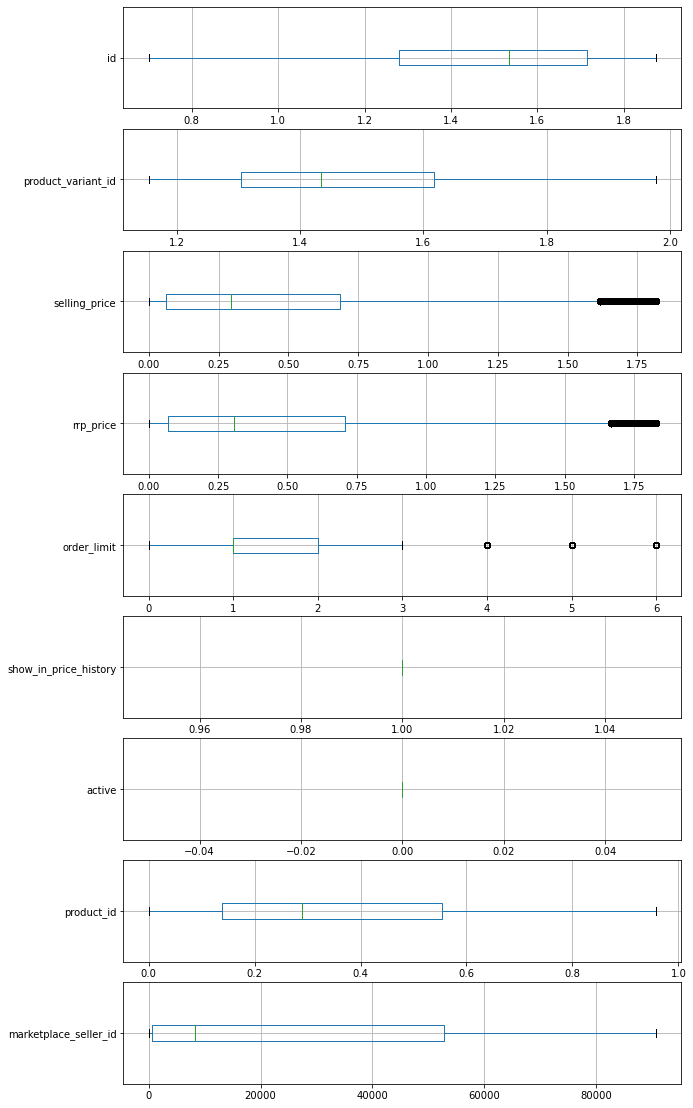

,نام ویژگی,نوع,بازه مقادیر,Min,Max,Mean,Mode,Median,مقادیر پرت
0,id,float64,From 7003798.0 to 18752077.0,7.0038e+06,1.87521e+07,1.48565e+07,NaN,1.53498e+07,topOutliers: 23679104.25 - downOutliers: 62694...
1,product_variant_id,float64,From 1155042.0 to 1977385.0,1.15504e+06,1.97738e+06,1.47422e+06,NaN,1.43423e+06,topOutliers: 2089106.5 - downOutliers: 832622.5
2,selling_price,float64,From 1.0 to 1.2500012000012e+17,1,1.25e+17,5.83507e+10,NaN,3.436e+06,topOutliers: 18169750.0 - downOutliers: -97498...
3,rrp_price,float64,From 1.0 to 1.2500012000012e+17,1,1.25e+17,5.85259e+10,NaN,3.5e+06,topOutliers: 18302500.0 - downOutliers: -97175...
4,base_price,object,,NaN,NaN,NaN,,NaN,
5,buy_price,object,,NaN,NaN,NaN,,NaN,
6,order_limit,float64,From 0.0 to 14500.0,0,14500,5.12729,NaN,1,topOutliers: 6.0 - downOutliers: -2.0
7,tags,object,,NaN,NaN,NaN,,NaN,
8,show_in_price_history,float64,From 0.0 to 1.0,0,1,0.998099,NaN,1,topOutliers: 1.0 - downOutliers: 1.0
9,active,float64,From 0.0 to 1.0,0,1,0.0623071,NaN,0,topOutliers: 0.0 - downOutliers: 0.0


In [13]:
order_date.dropna(inplace = True)
order_date_manipulated = order_date.replace(to_replace='\\N', value='')
order_date_manipulated = type_converter(order_date_manipulated, 'start_at')
order_date_manipulated = time_date_seperator(order_date_manipulated, 'start_at')

order_date_manipulated = type_converter(order_date_manipulated, 'end_at')
order_date_manipulated = time_date_seperator(order_date_manipulated, 'end_at')

order_date_manipulated = type_converter(order_date_manipulated, 'created_at')
order_date_manipulated = time_date_seperator(order_date_manipulated, 'created_at')

order_date_desc = order_date_manipulated.describe(include="all")

dframe = describtion(order_date_manipulated, order_date_desc)
dframe.to_excel(writer, sheet_name='Order_date')
dframe

#### Comments database

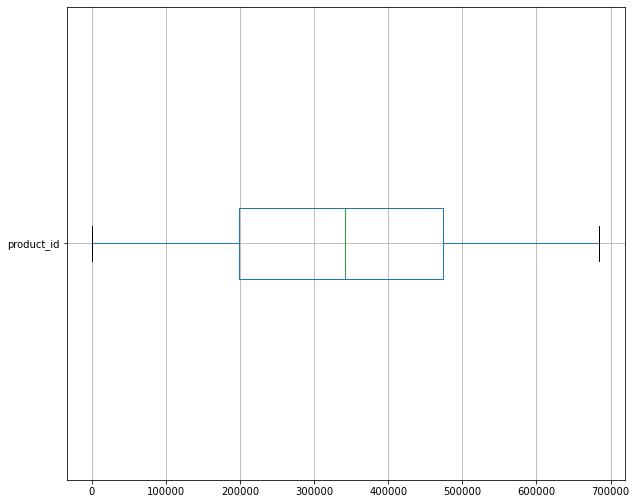

,نام ویژگی,نوع,بازه مقادیر,Min,Max,Mean,Mode,Median,مقادیر پرت
0,product_id,float64,From 281.0 to 684859.0,281,684859,333614,NaN,342220,topOutliers: 888108.0 - downOutliers: -215556.0
1,comment,object,,NaN,NaN,NaN,عالی,NaN,
2,confirmed_at_time,object,,NaN,NaN,NaN,09:19:37,NaN,
3,confirmed_at_date,object,,NaN,NaN,NaN,2018-04-04,NaN,


In [14]:
# table: comments

comments.dropna(inplace = True)
comments_manipulated = type_converter(comments, 'confirmed_at')
comments_manipulated = time_date_seperator(comments, 'confirmed_at')

comments_desc = comments_manipulated.describe(include="all")

dframe = describtion(comments_manipulated, comments_desc)
dframe.to_excel(writer, sheet_name='Comments')
dframe

#### Orders database

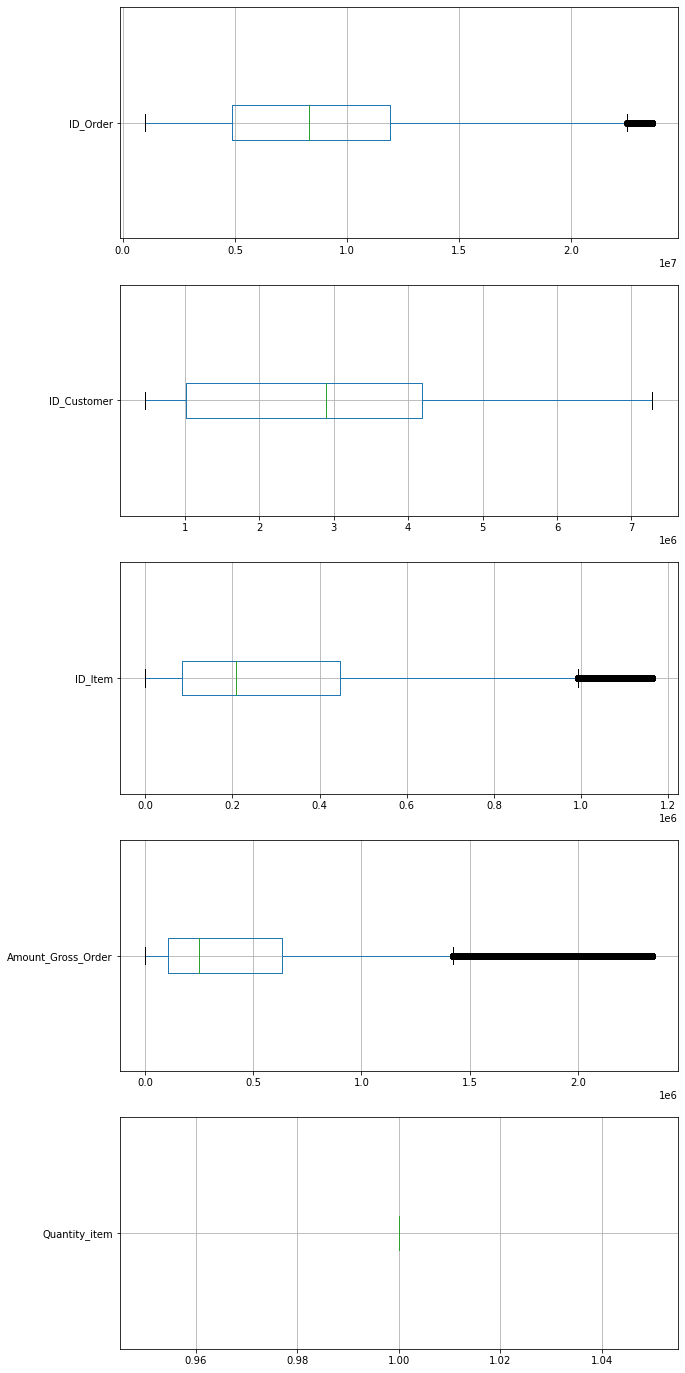

,نام ویژگی,نوع,بازه مقادیر,Min,Max,Mean,Mode,Median,مقادیر پرت
0,ID_Order,float64,From 1000411.0 to 24846558.0,1.00041e+06,2.48466e+07,9.87196e+06,NaN,8.59127e+06,topOutliers: 23617535.875 - downOutliers: -613...
1,ID_Customer,float64,From 466132.0 to 7282118.0,466132,7.28212e+06,2.86067e+06,NaN,2.89518e+06,topOutliers: 8916465.5 - downOutliers: -3716194.5
2,ID_Item,float64,From 76.0 to 2093722.0,76,2.09372e+06,375731,NaN,230221,topOutliers: 1163831.0 - downOutliers: -555007.0
3,Amount_Gross_Order,float64,From 0.0 to 1530000000.0,0,1.53e+09,1.4582e+06,NaN,321101,topOutliers: 2345671.125 - downOutliers: -1213...
4,city_name_fa,object,,NaN,NaN,NaN,تهران,NaN,
5,Quantity_item,float64,From 1.0 to 500.0,1,500,1.26123,NaN,1,topOutliers: 1.0 - downOutliers: 1.0
6,DateTime_CartFinalize_time,object,,NaN,NaN,NaN,17:32:36,NaN,
7,DateTime_CartFinalize_date,object,,NaN,NaN,NaN,2017-12-19,NaN,


In [15]:
orders.dropna(inplace = True)

orders_manipulated = type_converter(orders, 'DateTime_CartFinalize')
orders_manipulated = time_date_seperator(orders, 'DateTime_CartFinalize')

orders_desc = orders_manipulated.describe(include="all")

dframe = describtion(orders_manipulated, orders_desc)
dframe.to_excel(writer, sheet_name='Orders')
dframe

#### Quality database

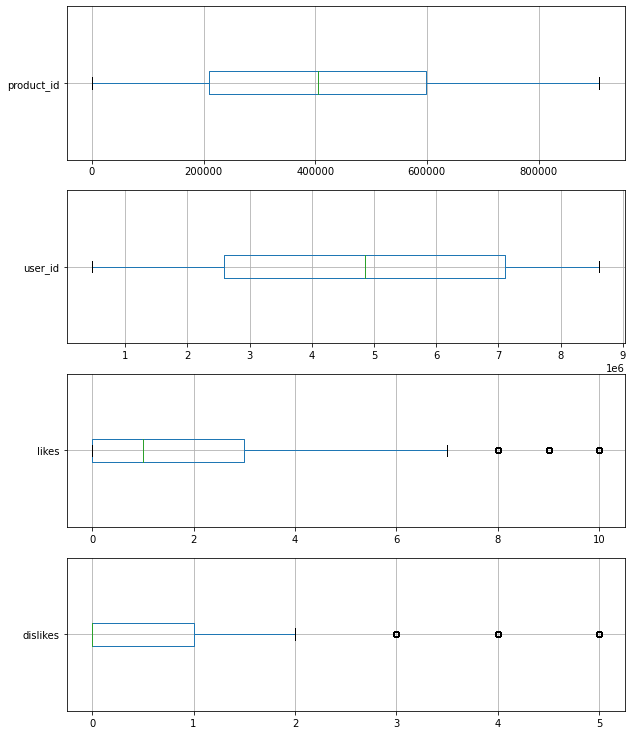

,نام ویژگی,نوع,بازه مقادیر,Min,Max,Mean,Mode,Median,مقادیر پرت
0,product_id,float64,From 300.0 to 908917.0,300,908917,412510,NaN,405146,topOutliers: 1180373.0 - downOutliers: -371483.0
1,product_title,object,,NaN,NaN,NaN,مچ بند هوشمند شیائومی مدل Mi Band 2,NaN,
2,title_en,object,,NaN,NaN,NaN,AC,NaN,
3,user_id,float64,From 466132.0 to 8623288.0,466132,8.62329e+06,4.66912e+06,NaN,4.86245e+06,topOutliers: 13863722.25 - downOutliers: -4166...
4,likes,float64,From 0.0 to 495.0,0,495,3.45166,NaN,2,topOutliers: 10.0 - downOutliers: -6.0
5,dislikes,float64,From 0.0 to 1344.0,0,1344,1.97904,NaN,0,topOutliers: 5.0 - downOutliers: -3.0
6,verification_status,object,,NaN,NaN,NaN,verified,NaN,
7,recommend,object,,NaN,NaN,NaN,recommended,NaN,
8,title,object,,NaN,NaN,NaN,عالیه,NaN,
9,comment,object,,NaN,NaN,NaN,عالی,NaN,


In [16]:
quality.dropna(inplace = True)
quality_desc = quality.describe(include="all")

dframe = describtion(quality, quality_desc)
dframe.to_excel(writer, sheet_name='Quality')
dframe

In [17]:
writer.save()